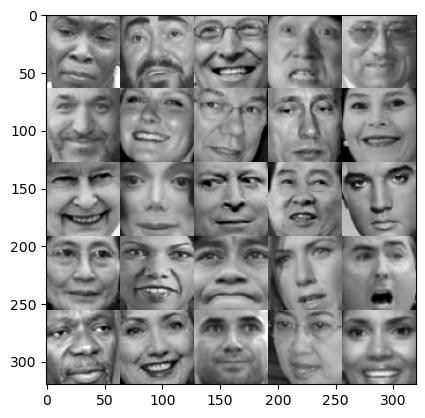

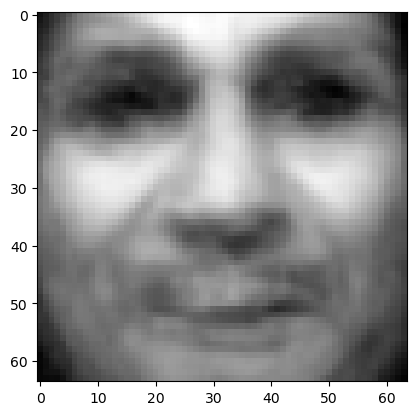

shape is (4096, 1)
tile is (4096, 25)
tile is (4096, 25)


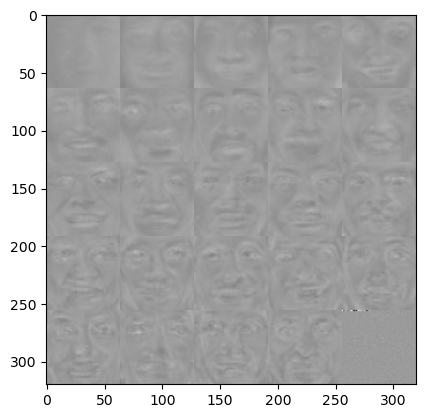

Shape of coefficients matrix: (25, 25)


In [1]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from glob import glob

## Code snippets you'll need in no particular order

#right-hand sides
#1) np.linalg.svd(X,full_matrices=0)
#2) U[:,i]
#3) np.mean(trainingFaces,axis=1)[:,np.newaxis]

# Identify naming pattern of files to be read into Python from glob import glob
dir = '.'
pgm_files = glob(f'{dir}/facedata/training/*.pgm')

# Compute number of image files
M = len(pgm_files)

# Compute size of image files
img=io.imread(pgm_files[0], as_gray=True)
m,n = img.shape

# Initialize matrix whose columns correspond to individual images
trainingFaces = np.zeros((m*n,M))

# Initialize matrix whose tiles correspond to individual images
allPersons = np.zeros((m*int(np.sqrt(M)),n*int(np.sqrt(M))))
count = 0

# Open figure window where you will display the images
fig1 = plt.figure()

# Loop over all image files
for i in range(0,M):

    # Acquire the filename of image i
    filename = pgm_files[i]

    # Read image i into Python as a 64 x 64 matrix
    img=io.imread(filename, as_gray=True)

    trainingFaces[:,i] = img.flatten()

    j = int(count % np.sqrt(M))
    k = int((count-count % np.sqrt(M))/np.sqrt(M))
    allPersons[k*m : (k+1)*m,j*n : (j+1)*n] = img
    count += 1

plt.imshow(allPersons,cmap=plt.cm.gray)
plt.show()

#-------- your code begins here--
avgFace = np.mean(trainingFaces,axis=1)[:,np.newaxis]
#-------- your code ends here----

plt.imshow(np.reshape(avgFace,(m,n)),cmap=plt.cm.gray)
plt.show()

# Compute eigenfaces on mean-subtracted training data
print("shape is",avgFace.shape)
print("tile is",np.tile(avgFace,(1,M)).shape)
print("tile is",trainingFaces.shape)
X = trainingFaces - np.tile(avgFace,(1,M))

#-------- your code begins here--
U, S, VT = np.linalg.svd(X,full_matrices=0)
#-------- your code ends here--

# Initialize matrix whose tiles correspond to eigenFaces
eigenFaces = np.zeros((m*int(np.sqrt(M)),n*int(np.sqrt(M))))
count = 0

# Loop over all image files
for i in range(0,M):

    # Take ith left singular vector
    #-------- your code begins here--
    img = U[:,i]
    #-------- your code ends here----

    j = int(count % np.sqrt(M))
    k = int((count-count % np.sqrt(M))/np.sqrt(M))
    eigenFaces[k*m : (k+1)*m,j*n : (j+1)*n] = np.reshape(img,(m,n))
    count += 1

plt.imshow(eigenFaces,cmap=plt.cm.gray)
plt.show()

coefficients = np.dot(U.T, X)
print("Shape of coefficients matrix:", coefficients.shape)

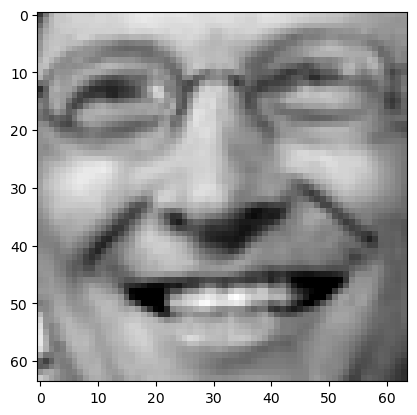

In [2]:
# Bill Gates
favimg=io.imread(pgm_files[2], as_gray=True)
plt.imshow(favimg,cmap=plt.cm.gray)
plt.show()

In [3]:
favimg_flattened = favimg.flatten()[:, np.newaxis]  # Convert to column vector
favimg_centered = favimg_flattened - avgFace

In [4]:
favimg_coefficients = np.dot(U.T, favimg_centered)
distances = np.linalg.norm(coefficients - favimg_coefficients, axis=0)
best_match_index = np.argmin(distances)
print(f"Best match is training image index: {best_match_index}")

Best match is training image index: 2


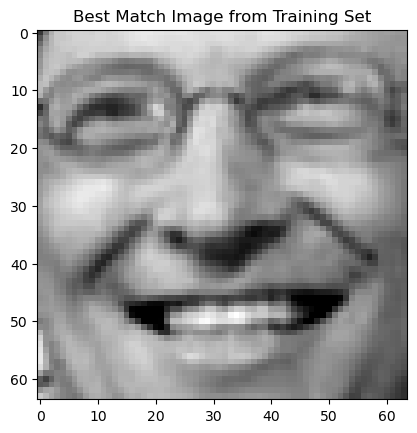

In [5]:
best_match_image = np.reshape(trainingFaces[:, best_match_index], (m, n))
plt.imshow(best_match_image, cmap=plt.cm.gray)
plt.title("Best Match Image from Training Set")
plt.show()

In [6]:
print(f"Euclidean distance to best match: {distances[best_match_index]}")

Euclidean distance to best match: 5.327797540168975e-12


In [21]:
# Let's test out of sample image
pgm_files = "/Users/zhanhe.huang/Downloads/MATH122A_HW5/facedata/test/Clint_Eastwood_0005.pgm"


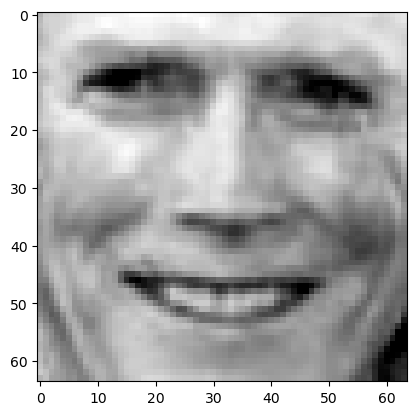

In [25]:
testimg = io.imread(pgm_files, as_gray=True)
plt.imshow(testimg, cmap=plt.cm.gray)
plt.show()

In [27]:
clint_img_flattened = testimg.flatten()[:, np.newaxis] 
clint_img_centered = clint_img_flattened - avgFace

In [28]:
clint_coefficients = np.dot(U.T, clint_img_centered)

In [29]:
distances = np.linalg.norm(coefficients - clint_coefficients, axis=0)

In [30]:
best_match_index = np.argmin(distances)
print(f"Best match for Clint Eastwood is training image index: {best_match_index}")


Best match for Clint Eastwood is training image index: 5


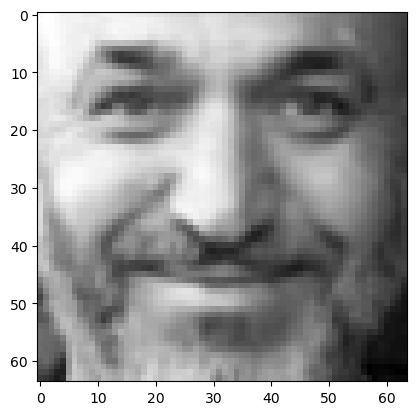

In [32]:
best_match_image = np.reshape(trainingFaces[:, best_match_index], (m, n))
plt.imshow(best_match_image, cmap=plt.cm.gray)

plt.show()

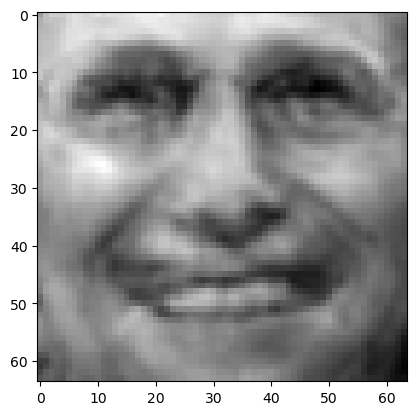

In [35]:
clint_reconstructed = np.dot(U, clint_coefficients) + avgFace
clint_reconstructed_image = np.reshape(clint_reconstructed, (m, n))
plt.imshow(clint_reconstructed_image, cmap=plt.cm.gray)
plt.show()